In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as mdates
import datetime as dt

In [2]:
read_file=pd.read_csv('/home/datagirl/final_task/dilans_data.csv', delimiter=';', names = ['date', 'event_type', 'country', 'user_id', 'source', 'topic'], dtype={'user_id':np.str})

In [3]:
## Split date and time columns
read_file[['date','time']] = read_file.date.str.split(" ",expand=True,)
read_file=read_file[['date', 'time', 'event_type', 'country', 'user_id', 'source', 'topic']]

In [4]:
## Create different user types from event types and format

not_source=['Africa','Asia','Australia','Europe','North America','South America']
read_users=read_file.loc[read_file['event_type']=='read']
read_users['source']=read_users['source'].map({not_source[0]:"none", not_source[1]:"none",not_source[2]:"none",not_source[3]:"none",not_source[4]:"none",not_source[5]:"none","SEO":"SEO","Reddit":"Reddit","AdWords":"AdWords"})

first_timers=read_users.loc[read_users.source!='none']

returning_users = read_users.loc[read_users.source=='none']
del returning_users['topic']
returning_users = returning_users.rename(columns={"source": "topic"})

subscribe_users=read_file.copy()
subscribe_users = subscribe_users.drop(['user_id', 'source', 'topic'], axis=1)
subscribe_users = subscribe_users.loc[subscribe_users['event_type']=='subscribe']
subscribe_users = subscribe_users.rename(columns={"country": "user_id"})

buy_users=read_file.copy()
buy_users = buy_users.loc[buy_users['event_type']=='buy']
buy_users = buy_users.rename(columns={"country": "user_id", "user_id": "price"})
buy_users = buy_users.drop(['source', 'topic'], axis=1)
buy_users=buy_users.astype({'price':int})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


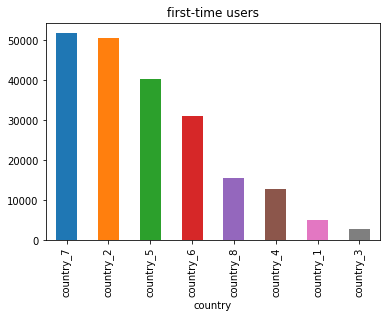

In [12]:
## Answer #1 is country_5 as per the following bar charts
df=first_timers.groupby('country').count().sort_values(by='user_id', ascending=False)['user_id']
plt.title('first-time users')
df.plot(kind='bar')

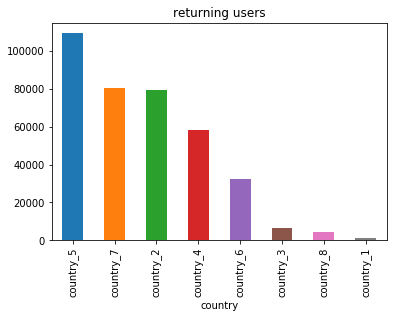

In [14]:
df=returning_users.groupby('country').count().sort_values(by='user_id', ascending=False)['user_id']
plt.title('returning users')
df.plot(kind='bar')

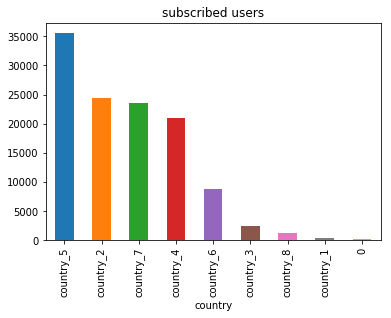

In [24]:
df=subscribe_users.merge(returning_users, how='left', left_on='user_id', right_on='user_id').fillna(0).groupby(['country']).count().sort_values(by='user_id', ascending=False).user_id
plt.title('subscribed users')
df.plot(kind='bar')
#df.head()

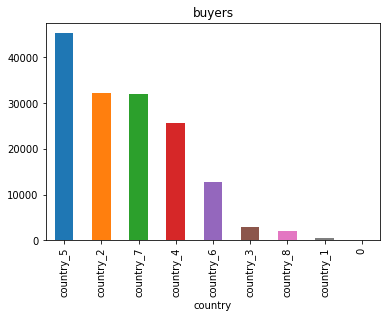

In [25]:
df=buy_users.merge(returning_users, how='left', left_on='user_id', right_on='user_id').fillna(0).groupby(['country']).count().sort_values(by='user_id', ascending=False).user_id
plt.title('buyers')
df.plot(kind='bar')
#df.head()

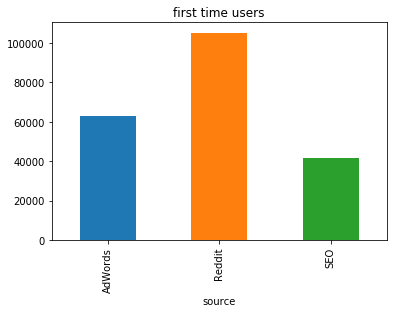

In [28]:
## Answer #2 is to invest more in Reddit and SEO sources and keep AdWords investment constant
df1=first_timers.groupby('source').user_id.count()
plt.title('first time users')
df1.plot(kind='bar')

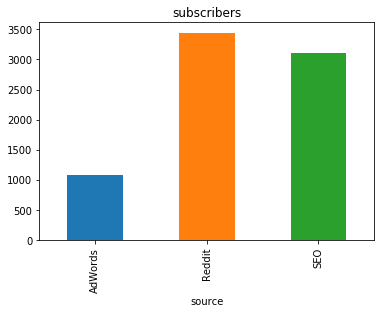

In [30]:
df2=subscribe_users.merge(first_timers, how='left', left_on='user_id', right_on='user_id').fillna(0).groupby(['source']).count().user_id
plt.title('subscribers')
df2.plot(kind='bar')

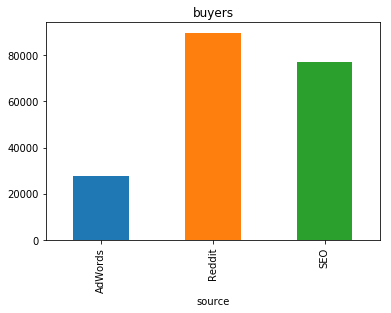

In [26]:
df2=buy_users.merge(first_timers, how='left', left_on='user_id', right_on='user_id').fillna(0).groupby(['source']).sum().price
plt.title('buyers')
df2.plot(kind='bar')

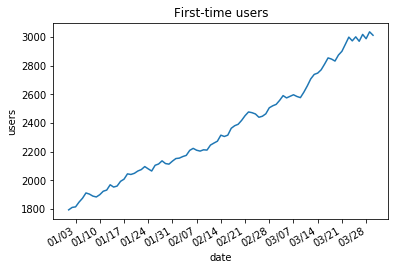

In [10]:
## Answer #3 is as per the below graph the first time users have been constantly increasing.
## There is also a fair number of increase in returning users and buyers.

first_users = first_timers.groupby('date').count().user_id

dates=first_users.index
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
y=first_users.values
c=first_users.count()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

ax.xaxis_date()
plt.plot(x,y)
plt.gcf().autofmt_xdate()

plt.title('First-time users')
plt.xlabel('date')
plt.ylabel('users')
plt.show()

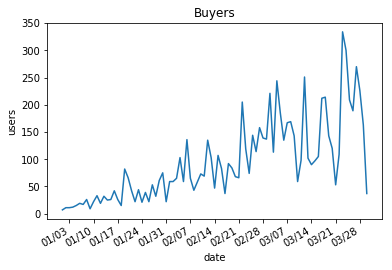

In [11]:
buyers = buy_users.groupby('date').count().user_id

dates=buyers.index
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
y=buyers.values
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

ax.xaxis_date()
plt.plot(x,y)
plt.gcf().autofmt_xdate()

plt.title('Buyers')
plt.xlabel('date')
plt.ylabel('users')
plt.show()

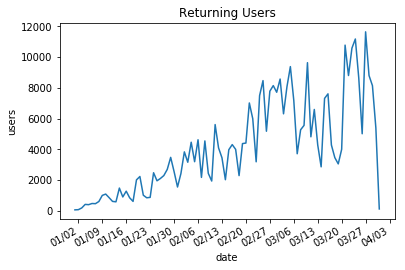

In [9]:
returners = returning_users.groupby('date').count().user_id

dates=returners.index
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
y=returners.values
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

ax.xaxis_date()
plt.plot(x,y)
plt.gcf().autofmt_xdate()

plt.title('Returning Users')
plt.xlabel('date')
plt.ylabel('users')
plt.show()

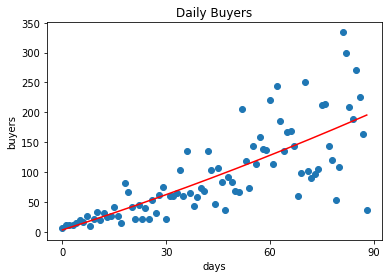

In [8]:
daily_buyers=buy_users.groupby('date').count().user_id
c=daily_buyers.count()
date=pd.date_range('2018-01-01', periods=c)
count=daily_buyers.values

df = pd.DataFrame({'date' : date,
                   'count' : count})

x = np.arange(date.size)
y = df['count']
fit = np.polyfit(x, y, 2)
predict = np.poly1d(fit)

x_test = np.linspace(x.min(), x.max(), 210)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MultipleLocator(30))
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.xlabel('days')
plt.ylabel('buyers')
plt.title('Daily Buyers')
plt.show()